<a href="https://colab.research.google.com/github/annstasi/clustering_kmeans/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Алгоритм:
1.   Для каждой точки ставится в соответствии ближайший к ней центр кластера

2.   Вычисляются средние арифметические точек, принадлежащих определённому кластеру. Эти значения становятся новыми центрами кластеров

3.   Повторять шаги пока центры кластеров не совпадают с предыдущими


In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving dataAll.txt to dataAll.txt


In [ ]:
df = pd.read_csv('dataAll.txt', delimiter = "\t", decimal=',')
df # данные за 2010 год


,name,milkPrice,salary,distance,latitude,FO,population
0,Алтайский край,23.90,11029.3,3785,59,УФО,2419755
1,Амурская область,34.90,14323.4,7620,75,ДВФО,830103
2,Архангельская область,32.38,19608.8,1318,68,СЗФО,1227626
3,Ненецкий авт.округ,69.37,52270.1,2217,50,УФО,42090
4,Астраханская область,29.64,14697.2,1394,65,УФО,1010073
...,...,...,...,...,...,...,...
77,Республика Хакасия,32.64,12806.4,4384,66,СФО,532403
78,Чеченская Республика,35.00,11982.4,1857,53,СКФО,1268989
79,Чувашская Республика,27.62,11065.8,691,68,ПФО,1251619
80,Республика Саха (...,48.80,23088.1,6984,63,ДВФО,958528


In [ ]:
df.info() # информация о столбцах таблицы и типах переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        82 non-null     object 
 1   milkPrice   82 non-null     float64
 2   salary      82 non-null     float64
 3   distance    82 non-null     int64  
 4   latitude    82 non-null     int64  
 5   FO          82 non-null     object 
 6   population  82 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.6+ KB


In [ ]:
df.describe() # статистики по столбцам с количественными переменными

,milkPrice,salary,distance,latitude,population
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01
mean,31.187805,17085.767073,2175.000000,60.390244,1.767113e+06
std,9.940585,7551.263528,2400.881474,8.471821,1.704321e+06
min,21.630000,7774.000000,0.000000,45.000000,4.209000e+04
25%,24.952500,13147.525000,630.000000,53.250000,8.040825e+05
50%,27.975000,14691.150000,1330.000000,61.000000,1.239622e+06
75%,32.562500,17448.650000,2513.000000,67.000000,2.426501e+06
max,71.290000,52270.100000,9968.000000,75.000000,1.150350e+07


Count — количество значений.
Mean — среднее значение.
Std — стандартное отклонение значения.
Min — минимальное значение.
Max — максимальное значение.
25% — первый квартиль, означающий, что 25% значений в столбце ниже этого значения.
50% — медиана, означающая, что половина значений в столбце ниже этого значения.
75% — третий квартиль, означающий, что 75% значений в столбце ниже этого значения.

In [ ]:
df.columns #  список столбцов

Index(['name', 'milkPrice', 'salary', 'distance', 'latitude', 'FO',
       'population'],
      dtype='object')

In [ ]:
col=['milkPrice','salary', 'distance'] # количественные столбцы, по которым будет выполнена кластеризация

In [ ]:
pd.options.mode.chained_assignment = None

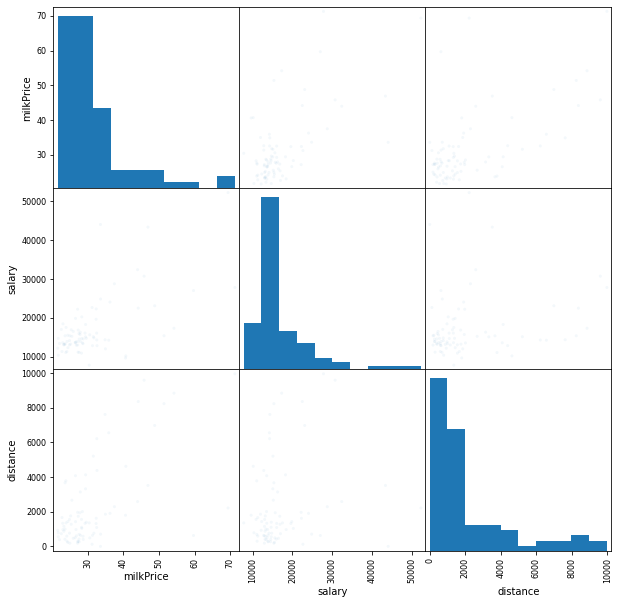

In [ ]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(10, 10));

In [ ]:
df[col].corr() # рассмотрим парные корреляции
# Наблюдается средняя зависимость между зарплатой и ценами на молоко и
# между расстоянием до Москвы и ценами на молоко.

,milkPrice,salary,distance
milkPrice,1.000000,0.628698,0.606966
salary,0.628698,1.000000,0.186956
distance,0.606966,0.186956,1.000000


In [ ]:
# приводим данные к нормальным значениям (от 0 до 1)
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)
dataNorm

array([[0.04571083, 0.07315922, 0.37971509],
       [0.26721708, 0.14719043, 0.76444623],
       [0.21647201, 0.26597387, 0.13222311],
       [0.96133709, 1.        , 0.22241172],
       [0.16129682, 0.15559116, 0.13984751],
       [0.02013693, 0.2071822 , 0.07353531],
       [0.01006847, 0.12550313, 0.03872392],
       [0.11216271, 0.11646414, 0.01845907],
       [0.10289972, 0.13486126, 0.09741172],
       [0.06645187, 0.14250912, 0.07654494],
       [0.12827225, 0.13729967, 0.06420546],
       [0.08759565, 0.19559692, 0.0467496 ],
       [0.11457914, 0.07527626, 0.02999599],
       [0.20096657, 0.16486164, 0.52277287],
       [0.38260169, 0.04171152, 0.18037721],
       [0.21969392, 0.18577134, 0.1092496 ],
       [0.11296818, 0.1370592 , 0.02648475],
       [0.05638341, 0.17312529, 0.02317416],
       [0.0761176 , 0.20491908, 0.12810995],
       [0.7664116 , 0.43231429, 0.06300161],
       [0.04128071, 0.17006434, 0.36817817],
       [0.04107934, 0.1248851 , 0.09981942],
       [0.

In [ ]:
# Вычислим расстояния между каждым набором данных
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Объедение элементов в кластера и сохранение в
# специальной переменной (используется ниже для визуализации
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

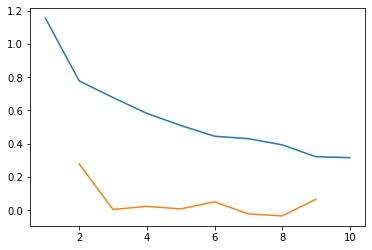

Рекомендованное количество кластеров: 2


In [ ]:
# оцениваем оптимальное количество сегментов, метод локтя
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Рекомендованное количество кластеров:", k)

In [ ]:
# функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
# используем 2 кластера
nClust=2

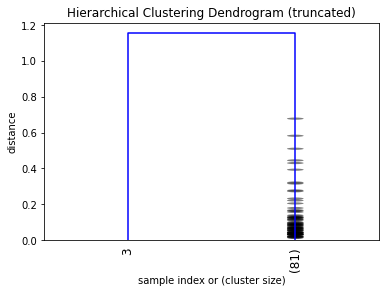

In [ ]:
# строим дендрограмму
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [ ]:
# строим кластеризацию методом k-means
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [ ]:
# выведем полученное распределение по кластерам
km.labels_ +1

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

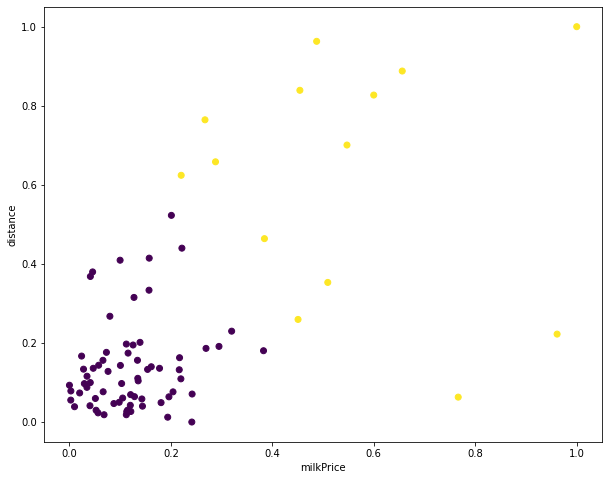

In [ ]:
x=0
y=2
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='viridis')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,milkPrice,salary,distance,Количество
KMeans,,,,
1,48.560714,24623.65,6141.928571,14
2,27.611029,15533.85,1358.279412,68


In [ ]:
df[df['KMeans']==1] # смотрим содержание кластера

,name,milkPrice,salary,distance,latitude,FO,population,KMeans
1,Амурская область,34.90,14323.4,7620,75,ДВФО,830103,1
3,Ненецкий авт.округ,69.37,52270.1,2217,50,УФО,42090,1
19,Камчатский край,59.69,27010.3,628,65,ДВФО,322079,1
30,Магаданская область,71.29,27800.7,9968,54,ДВФО,156996,1
35,Приморский край,54.21,17297.9,8850,61,ДВФО,1956497,1
46,Сахалинская область,45.83,30727.0,9599,49,ДВФО,497973,1
54,Ханты-Мансийский ...,44.01,32385.0,2587,69,УФО,1532243,1
55,Ямало-Ненецкий ав...,46.92,43367.1,3520,55,УФО,522904,1
58,Забайкальский край,35.93,14204.5,6561,55,ДВФО,1107107,1
61,Хабаровский край,44.19,22478.9,8364,71,ДВФО,1343869,1


In [ ]:
# используем 4 кластерa
nClust=4

In [ ]:
# строим кластеризацию методом k-means
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [ ]:
# выведем полученное распределение по кластерам
# номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([4, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1, 4, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 2, 1, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 4, 3, 3, 1, 1, 1, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 2, 2], dtype=int32)

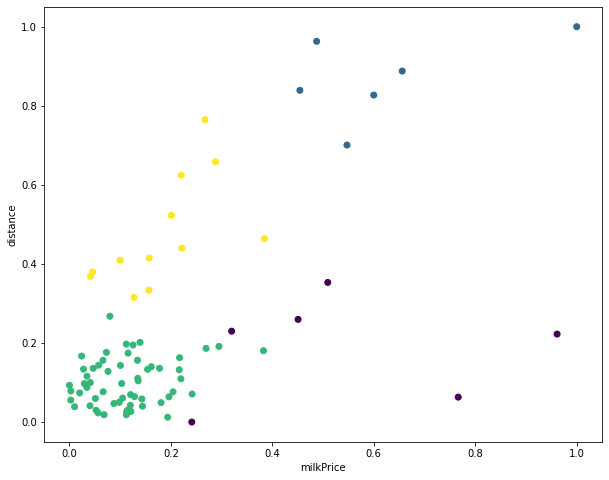

In [ ]:
x=0
y=2
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='viridis')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номера кластеров
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Количество']=df.groupby('KMeans').size().values
res

,milkPrice,salary,distance,Количество
KMeans,,,,
1,48.518333,37973.450000,1873.833333,6
2,52.623333,22790.066667,8668.166667,6
3,27.262069,14932.124138,1005.931034,58
4,30.779167,14199.050000,4729.500000,12


In [ ]:
df[df['KMeans']==2] # смотрим содержание кластера

,name,milkPrice,salary,distance,latitude,FO,population,KMeans
30,Магаданская область,71.29,27800.7,9968,54,ДВФО,156996,2
35,Приморский край,54.21,17297.9,8850,61,ДВФО,1956497,2
46,Сахалинская область,45.83,30727.0,9599,49,ДВФО,497973,2
61,Хабаровский край,44.19,22478.9,8364,71,ДВФО,1343869,2
80,Республика Саха (...,48.80,23088.1,6984,63,ДВФО,958528,2
81,Еврейская автоном...,51.42,15347.8,8244,68,ДВФО,176558,2


In [ ]:
df = pd.read_csv('dataAll.txt', delimiter = "\t", decimal=',')
df # данные за 2010 год

,name,milkPrice,salary,distance,latitude,FO,population
0,Алтайский край,23.90,11029.3,3785,59,УФО,2419755
1,Амурская область,34.90,14323.4,7620,75,ДВФО,830103
2,Архангельская область,32.38,19608.8,1318,68,СЗФО,1227626
3,Ненецкий авт.округ,69.37,52270.1,2217,50,УФО,42090
4,Астраханская область,29.64,14697.2,1394,65,УФО,1010073
...,...,...,...,...,...,...,...
77,Республика Хакасия,32.64,12806.4,4384,66,СФО,532403
78,Чеченская Республика,35.00,11982.4,1857,53,СКФО,1268989
79,Чувашская Республика,27.62,11065.8,691,68,ПФО,1251619
80,Республика Саха (...,48.80,23088.1,6984,63,ДВФО,958528


In [ ]:
x = 'milkPrice'
y = 'salary'
df = df.loc[:,[x,y]]
df

,milkPrice,salary
0,23.90,11029.3
1,34.90,14323.4
2,32.38,19608.8
3,69.37,52270.1
4,29.64,14697.2
...,...,...
77,32.64,12806.4
78,35.00,11982.4
79,27.62,11065.8
80,48.80,23088.1


In [ ]:
# стандартизация
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
data = normalize.fit_transform(df)
col= [x,y]
df = pd.DataFrame(data, columns=col)
df

,milkPrice,salary
0,0.045711,0.073159
1,0.267217,0.147190
2,0.216472,0.265974
3,0.961337,1.000000
4,0.161297,0.155591
...,...,...
77,0.221708,0.113098
78,0.269231,0.094579
79,0.120620,0.073980
80,0.547120,0.344167


Text(0, 0.5, 'salary')

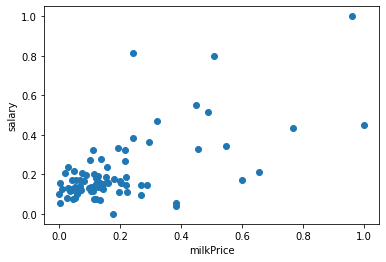

In [ ]:
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)

In [ ]:
import random

def Initiate_Centroid(df,x,y,k):
  random.seed(10)
  centroids = {i + 1 : [random.choices(df[x]),random.choices(df[y])] for i in range(k)}
  return centroids

[[0.4873137333870317], [0.21403898319178535]]
[[0.11216270640354403], [0.13705920294138138]]


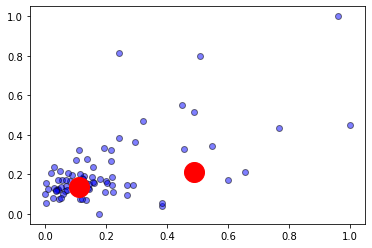

In [ ]:
k=2
cen = Initiate_Centroid(df,x,y,k)
for i in cen :
    print(cen[i])

plt.scatter(df[x], df[y], color='blue', alpha=0.5, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='red', s=400)
plt.show()

### Cчитаем расстояния Calc_Dist √((x1-x2)² + (y1-y2)²

In [ ]:
def Calc_Dist(df,x,y,centroid):
  for i in centroid.keys():
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2)
  return df

In [ ]:
df2 = Calc_Dist(df,x,y,cen)
df2

,milkPrice,salary,1,2
0,0.045711,0.073159,0.463530,0.092190
1,0.267217,0.147190,0.230024,0.155385
2,0.216472,0.265974,0.275776,0.165829
3,0.961337,1.000000,0.917841,1.210687
4,0.161297,0.155591,0.331215,0.052513
...,...,...,...,...
77,0.221708,0.113098,0.284140,0.112135
78,0.269231,0.094579,0.248658,0.162711
79,0.120620,0.073980,0.392531,0.063644
80,0.547120,0.344167,0.143214,0.481749


In [ ]:
colmap = ['blue','red','black','green']

In [ ]:
def df_membership(df,centroid):
  df['index cluster'] = (df.loc[:, ['{}'.format(i) for i in centroid.keys()]].idxmin(axis=1)).astype('int')
  df['color'] = df['index cluster'].map(lambda x: colmap[x])
  return df

In [ ]:
df2 = df_membership(df2,cen)
df2

,milkPrice,salary,1,2,index cluster,color
0,0.045711,0.073159,0.463530,0.092190,2,black
1,0.267217,0.147190,0.230024,0.155385,2,black
2,0.216472,0.265974,0.275776,0.165829,2,black
3,0.961337,1.000000,0.917841,1.210687,1,red
4,0.161297,0.155591,0.331215,0.052513,2,black
...,...,...,...,...,...,...
77,0.221708,0.113098,0.284140,0.112135,2,black
78,0.269231,0.094579,0.248658,0.162711,2,black
79,0.120620,0.073980,0.392531,0.063644,2,black
80,0.547120,0.344167,0.143214,0.481749,1,red


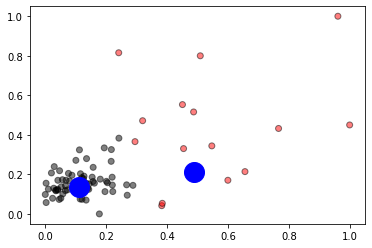

In [ ]:
plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='blue', s=400)
plt.show()

In [ ]:
res=df2.groupby('index cluster')[col].mean()
res['total']=df.groupby('index cluster').size().values
res

,milkPrice,salary,total
index cluster,,,
1,0.537012,0.437203,15
2,0.115328,0.158242,67


In [ ]:
df = pd.read_csv('dataAll.txt', delimiter = "\t", decimal=',')
df # данные за 2010 год

,name,milkPrice,salary,distance,latitude,FO,population
0,Алтайский край,23.90,11029.3,3785,59,УФО,2419755
1,Амурская область,34.90,14323.4,7620,75,ДВФО,830103
2,Архангельская область,32.38,19608.8,1318,68,СЗФО,1227626
3,Ненецкий авт.округ,69.37,52270.1,2217,50,УФО,42090
4,Астраханская область,29.64,14697.2,1394,65,УФО,1010073
...,...,...,...,...,...,...,...
77,Республика Хакасия,32.64,12806.4,4384,66,СФО,532403
78,Чеченская Республика,35.00,11982.4,1857,53,СКФО,1268989
79,Чувашская Республика,27.62,11065.8,691,68,ПФО,1251619
80,Республика Саха (...,48.80,23088.1,6984,63,ДВФО,958528


In [ ]:
x = 'milkPrice'
y = 'distance'
df = df.loc[:,[x,y]]
df

,milkPrice,distance
0,23.90,3785
1,34.90,7620
2,32.38,1318
3,69.37,2217
4,29.64,1394
...,...,...
77,32.64,4384
78,35.00,1857
79,27.62,691
80,48.80,6984


In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
data = normalize.fit_transform(df)
col= [x,y]
df = pd.DataFrame(data, columns=col)
df

,milkPrice,distance
0,0.045711,0.379715
1,0.267217,0.764446
2,0.216472,0.132223
3,0.961337,0.222412
4,0.161297,0.139848
...,...,...
77,0.221708,0.439807
78,0.269231,0.186296
79,0.120620,0.069322
80,0.547120,0.700642


Text(0, 0.5, 'distance')

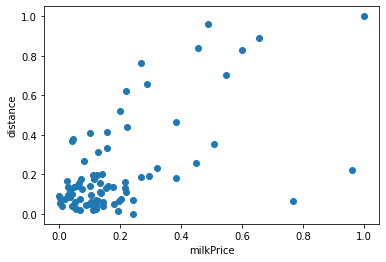

In [ ]:
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)

In [ ]:
import random

def Initiate_Centroid(df,x,y,k):
  random.seed(10)
  centroids = {i + 1 : [random.choices(df[x]),random.choices(df[y])] for i in range(k)}
  return centroids

[[0.4873137333870317], [0.8878410914927769]]
[[0.11216270640354403], [0.026484751203852328]]


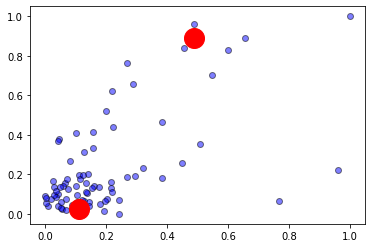

In [ ]:
k=2
cen = Initiate_Centroid(df,x,y,k)
for i in cen :
    print(cen[i])

plt.scatter(df[x], df[y], color='blue', alpha=0.5, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='red', s=400)
plt.show()

In [ ]:
def Calc_Dist(df,x,y,centroid):
  for i in centroid.keys():
    df[str(i)] = np.sqrt((df[x] - centroid[i][0]) ** 2 + (df[y] - centroid[i][1]) ** 2)
  return df

In [ ]:
df2 = Calc_Dist(df,x,y,cen)
df2

,milkPrice,distance,1,2
0,0.045711,0.379715,0.673205,0.359427
1,0.267217,0.764446,0.252327,0.754075
2,0.216472,0.132223,0.802692,0.148530
3,0.961337,0.222412,0.817003,0.871484
4,0.161297,0.139848,0.815954,0.123553
...,...,...,...,...
77,0.221708,0.439807,0.520846,0.427593
78,0.269231,0.186296,0.734660,0.224076
79,0.120620,0.069322,0.896905,0.043664
80,0.547120,0.700642,0.196521,0.802294


In [ ]:
def df_membership(df,centroid):
  df['index cluster'] = (df.loc[:, ['{}'.format(i) for i in centroid.keys()]].idxmin(axis=1)).astype('int')
  df['color'] = df['index cluster'].map(lambda x: colmap[x])
  return df

In [ ]:
df2 = df_membership(df2,cen)
df2

,milkPrice,distance,1,2,index cluster,color
0,0.045711,0.379715,0.673205,0.359427,2,black
1,0.267217,0.764446,0.252327,0.754075,1,red
2,0.216472,0.132223,0.802692,0.148530,2,black
3,0.961337,0.222412,0.817003,0.871484,1,red
4,0.161297,0.139848,0.815954,0.123553,2,black
...,...,...,...,...,...,...
77,0.221708,0.439807,0.520846,0.427593,2,black
78,0.269231,0.186296,0.734660,0.224076,2,black
79,0.120620,0.069322,0.896905,0.043664,2,black
80,0.547120,0.700642,0.196521,0.802294,1,red


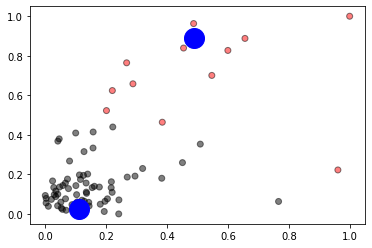

In [ ]:
plt.scatter(df2[x], df2[y], color=df2['color'], alpha=0.5, edgecolor='black')
for i in cen:
  plt.scatter(cen[i][0],cen[i][1],color='blue', s=400)
plt.show()

In [ ]:
res=df2.groupby('index cluster')[col].mean()
res['total']=df.groupby('index cluster').size().values
res

,milkPrice,distance,total
index cluster,,,
1,0.505571,0.706118,12
2,0.138789,0.134555,70
